In [1]:
import sys
import os
import pickle

library_path = os.path.join('..', '..', 'UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble
from neuralhydrology.UCB_training.UCB_train import UCB_trainer
from neuralhydrology.evaluation.metrics import calculate_all_metrics

Quick check that working directory and train basin file exists:

In [2]:
print("Current Working Directory:", os.getcwd())
print("Train Basin File Exists:", os.path.exists("calpella"))

Current Working Directory: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all
Train Basin File Exists: True


Run regular LSTM:

In [3]:
path_to_csv = Path("/Users/mia/research/russian_river_data_folder/")
path_to_yaml = Path("calpella_gage.yaml")
params = {
    "epochs":32
}
lstmNoPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params)

In [4]:
lstmNoPhysics.train()

2024-11-29 09:22:15,174: Logging to /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2911_092215/output.log initialized.
2024-11-29 09:22:15,176: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2911_092215
2024-11-29 09:22:15,179: ### Run configurations for testing_run
2024-11-29 09:22:15,181: experiment_name: testing_run
2024-11-29 09:22:15,185: train_basin_file: calpella
2024-11-29 09:22:15,187: validation_basin_file: calpella
2024-11-29 09:22:15,339: test_basin_file: calpella
2024-11-29 09:22:15,344: train_start_date: 1994-10-01 00:00:00
2024-11-29 09:22:15,348: train_end_date: 2002-09-30 00:00:00
2024-11-29 09:22:15,353: validation_start_date: 2002-10-01 00:00:00
2024-11-29 09:22:15,366: validation_end_date: 2005-09-30 00:00:00
2024-11-29 09:22:15,368: test_start_date: 2005-10-01 00:00:00
2024-11-29 09:22:15,373: test_end_date: 2009-09-30 00:00:00
2024-11-29 09:22:15,375: device: cpu


Using basin: Calpella
Using target variable: NR CALPELLA FLOW COE CPL


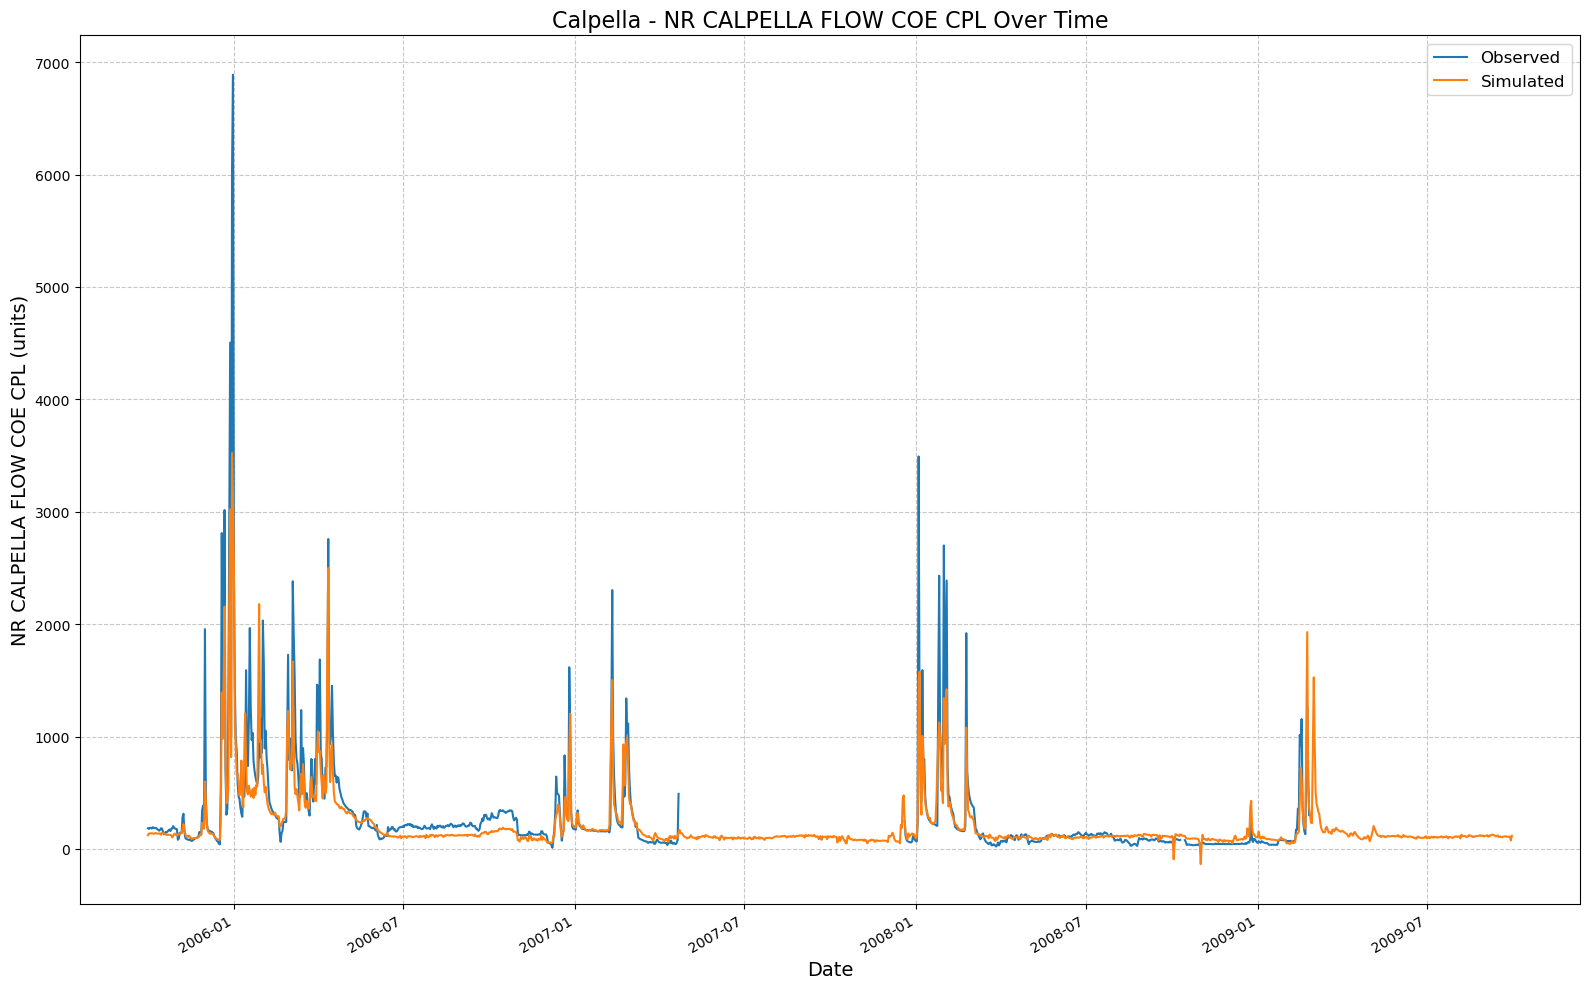

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2911_092215/results_output.csv


{'NSE': 0.7508027106523514,
 'MSE': 63465.50390625,
 'RMSE': 251.92360728254508,
 'KGE': 0.6041208503308916,
 'Alpha-NSE': 0.656219320020229,
 'Beta-KGE': 0.8265430331230164,
 'Beta-NSE': -0.10189761051202727,
 'Pearson-r': 0.9080879449842426,
 'FHV': -32.81887173652649,
 'FMS': -22.26978778476748,
 'FLV': -1004.4081893334263,
 'Peak-Timing': 0.75,
 'Peak-MAPE': 43.99275302886963}

In [5]:
lstmNoPhysics.results()

Now run physics informes lstm with HMS data:

In [34]:
path_to_csv = Path("/Users/mia/research/russian_river_data_folder/")
path_to_yaml = Path("calpella_gage.yaml")
path_to_physics_data = Path("/Users/mia/research/russian_river_data_folder/calpella.csv")
params = {
    "epochs":3
}
features_with_physics = [
    #from daily
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "POTTER VALLEY CA FLOW USGS_ADJUSTED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    'Capella Gage FLOW Calpella',
    #from capella.csv
    # 'EF Russian 20 ET-POTENTIAL Calpella',
    # 'EF Russian 20 FLOW Calpella',
    # 'EF Russian 20 FLOW-BASE Calpella',
    # 'EF Russian 20 INFILTRATION Calpella',
    # 'EF Russian 20 PERC-SOIL Calpella',
    # 'EF Russian 20 SATURATION FRACTION Calpella'
]
lstmPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data)

In [35]:
lstmPhysics.train()

2024-11-29 17:21:01,209: Logging to /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2911_172101/output.log initialized.
2024-11-29 17:21:01,211: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2911_172101
2024-11-29 17:21:01,213: ### Run configurations for testing_run
2024-11-29 17:21:01,216: experiment_name: testing_run
2024-11-29 17:21:01,269: train_basin_file: calpella
2024-11-29 17:21:01,272: validation_basin_file: calpella
2024-11-29 17:21:01,280: test_basin_file: calpella
2024-11-29 17:21:01,282: train_start_date: 1994-10-01 00:00:00
2024-11-29 17:21:01,286: train_end_date: 2002-09-30 00:00:00
2024-11-29 17:21:01,288: validation_start_date: 2002-10-01 00:00:00
2024-11-29 17:21:01,293: validation_end_date: 2005-09-30 00:00:00
2024-11-29 17:21:01,300: test_start_date: 2005-10-01 00:00:00
2024-11-29 17:21:01,303: test_end_date: 2009-09-30 00:00:00
2024-11-29 17:21:01,304: device: cpu


Using basin: Calpella
Using target variable: NR CALPELLA FLOW COE CPL


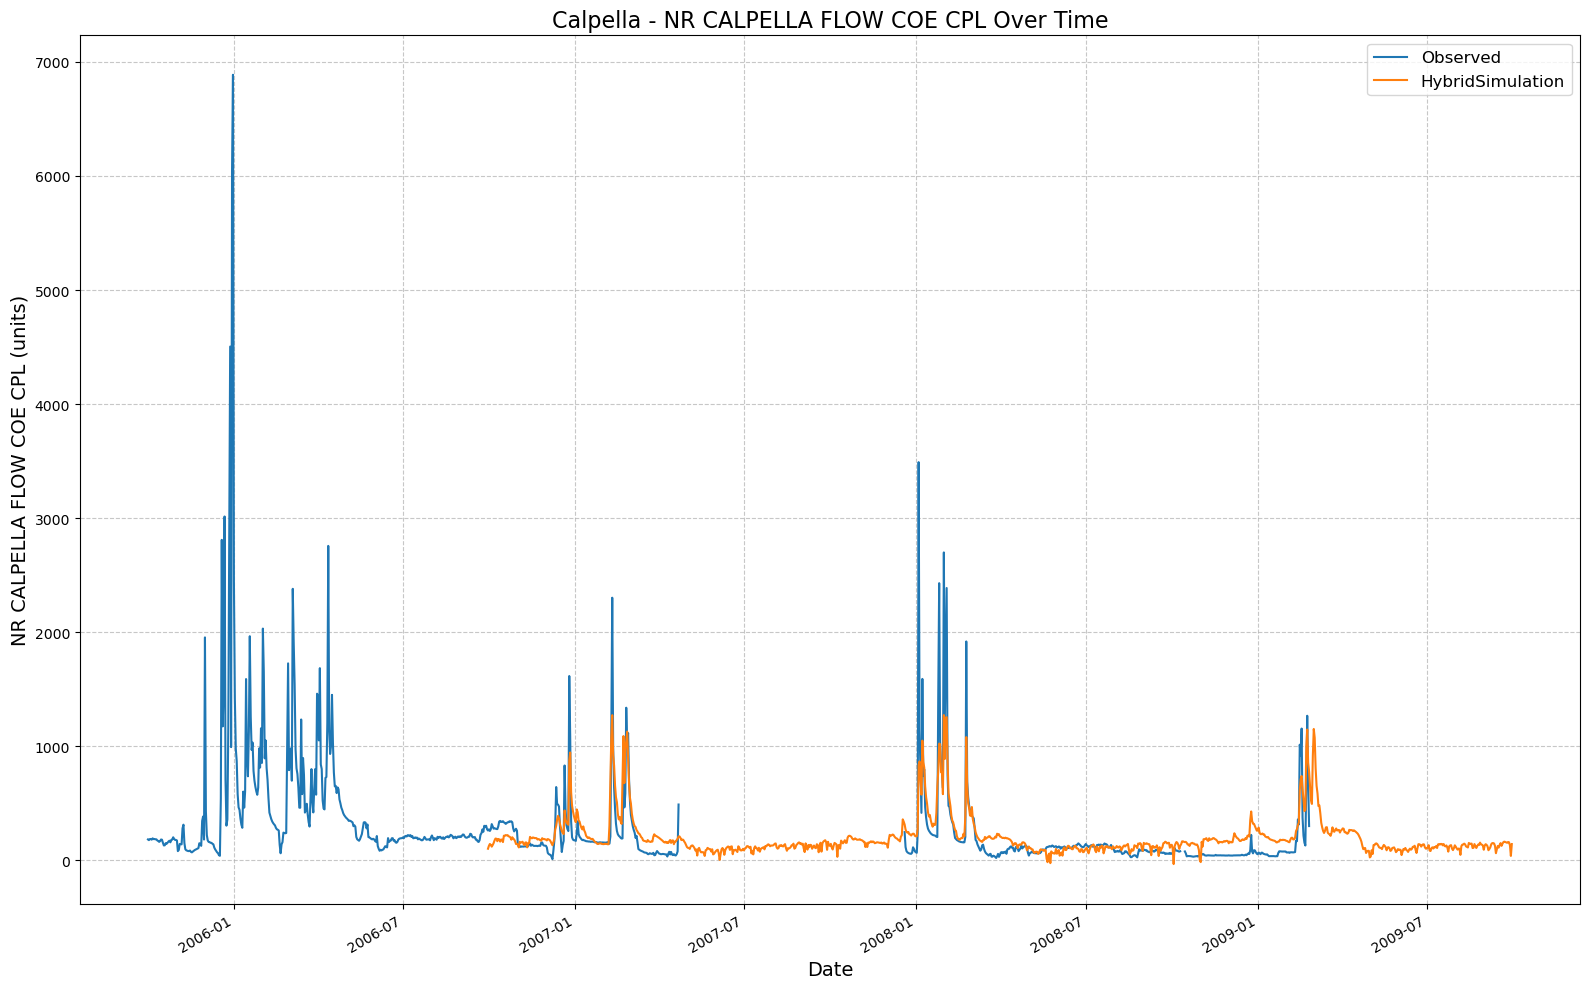

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2911_172101/results_output.csv


{'NSE': 0.6262664496898651,
 'MSE': 39153.65234375,
 'RMSE': 197.87281860768547,
 'KGE': 0.5476844348882662,
 'Alpha-NSE': 0.6391149043214344,
 'Beta-KGE': 1.2064059972763062,
 'Beta-NSE': 0.12546481571663815,
 'Pearson-r': 0.821820645281803,
 'FHV': -42.27842092514038,
 'FMS': -45.552602719612786,
 'FLV': -1116.706219542241,
 'Peak-Timing': 1.0,
 'Peak-MAPE': 43.76636743545532}

In [36]:
lstmPhysics.results()

Comparison to results from physicsLSTM : The following cells test the physics informed for the validation period, the way evan did in the testing_notebook

In [ ]:
#evans way: USES VALIDATION PERIOD!
run_dir = Path('/Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2911_092542')
eval_run(run_dir=run_dir, period="validation")

2024-11-29 09:55:08,349: Using the model weights from /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2911_092542/model_epoch032.pt
# Validation: 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]
2024-11-29 09:55:09,449: Stored metrics at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2911_092542/validation/model_epoch032/validation_metrics.csv
2024-11-29 09:55:09,461: Stored results at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2911_092542/validation/model_epoch032/validation_results.p


In [14]:
with open(run_dir / "validation" / "model_epoch032" / "validation_results.p", "rb") as fp:
    results = pickle.load(fp)
    
results['Calpella']['1D']['xr']

<xarray.Dataset>
Dimensions:                       (date: 1096, time_step: 1)
Coordinates:
  * date                          (date) datetime64[ns] 2002-10-01 ... 2005-0...
  * time_step                     (time_step) int64 0
Data variables:
    NR CALPELLA FLOW COE CPL_obs  (date, time_step) float32 83.71 ... 80.62
    NR CALPELLA FLOW COE CPL_sim  (date, time_step) float32 112.2 121.7 ... nan

Text(0.5, 1.0, 'Calpella Gage Validation period - NSE 0.837')

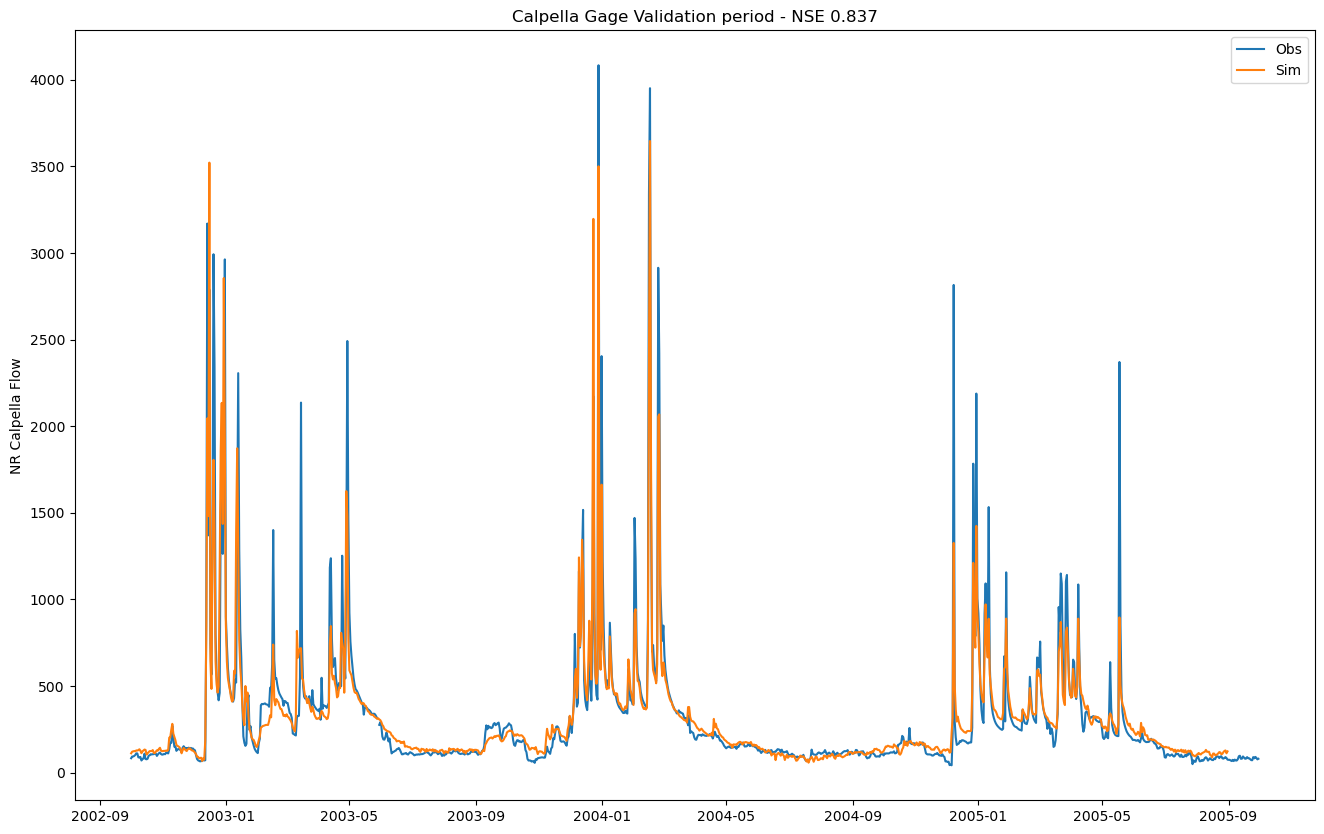

In [15]:

# extract observations and LSTM simulations
qobs = results['Calpella']['1D']['xr']['NR CALPELLA FLOW COE CPL_obs']
qsim = results['Calpella']['1D']['xr']['NR CALPELLA FLOW COE CPL_sim']

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(qobs["date"], qobs, label="Obs")
ax.plot(qsim["date"], qsim, label="Sim")
ax.set_ylabel("NR Calpella Flow")
ax.legend()
ax.set_title(f"Calpella Gage Validation period - NSE {results['Calpella']['1D']['NSE']:.3f}")

The following function combines the the results for the normal lstm, physics informed lstm and the hms results on one graph over a specified time period.

In [73]:
def combinedPlot(lstm_results: Path, lstmPhysics_results: Path, HMS_results: Path, title: str, 
                 test_start_date="01/10/2005", test_end_date="30/09/2009"):
    model1_df = pd.read_csv(lstm_results) #colums: Date, Observed, Predicted
    model2_df = pd.read_csv(lstmPhysics_results) #colums: Date, Observed, Predicted
    model1_df = model1_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model1',
        'Predicted': 'Predicted_Model1'
    })
    model1_df['date'] = pd.to_datetime(model1_df['date'])

    model2_df = model2_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model2',
        'Predicted': 'Predicted_Model2'
    })
    model2_df['date'] = pd.to_datetime(model2_df['date'])

    hms_df = pd.read_csv(HMS_results)
    hms_df = hms_df[2:]
    hms_df.columns = hms_df.columns.str.strip()
    hms_df = hms_df.drop(columns=['Ordinate'])
    hms_df = hms_df.rename(columns={'Date / Time': 'date'})
    hms_df['date'] = pd.to_datetime(hms_df['date'], format='%d-%b-%y')
    hms_df = hms_df.reset_index(drop=True)
    hms_df = hms_df.iloc[:, [0,1]] #Date, HMS predicted
    hms_df = hms_df.rename(columns={hms_df.columns[1]: "HMS_predicted"})
    hms_df["HMS_predicted"] = pd.to_numeric(hms_df["HMS_predicted"], errors="coerce")

    df = model1_df.merge(model2_df, how='right', on='date').merge(hms_df, how='right', on='date')

    # Filter for the test period
    test_start_date = pd.to_datetime("2005-10-01")
    test_end_date = pd.to_datetime("2009-09-30")
    df = df[(df['date'] >= test_start_date) & (df['date'] <= test_end_date)]

    # Plot all columns against the "date_col" (x-axis)
    plt.figure(figsize=(30, 10))
    
    plt.plot(df["date"], df["Observed_Model1"], label='Observed', color="blue", linewidth=1.5)
    plt.plot(df["date"], df["Predicted_Model1"], label='LSTM Prediction', color="purple", linewidth=1.5, alpha=0.8)
    plt.plot(df["date"], df["Predicted_Model2"], label='Physics Informed LSTM Prediction', color="orange", linewidth=1.5, alpha=0.8)
    plt.plot(df["date"], df["HMS_predicted"], label='HMS Prediction', color="lightblue", linewidth=1.2, alpha=0.6)

    # Customize the plot
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Inflow", fontsize=12)
    plt.title(title, fontsize=16)
    plt.legend(fontsize=10, loc="upper right")
    plt.grid(True, alpha=0.4)

    #plt.gcf.autofmt_xdate()
    plt.tight_layout()
    plt.show()

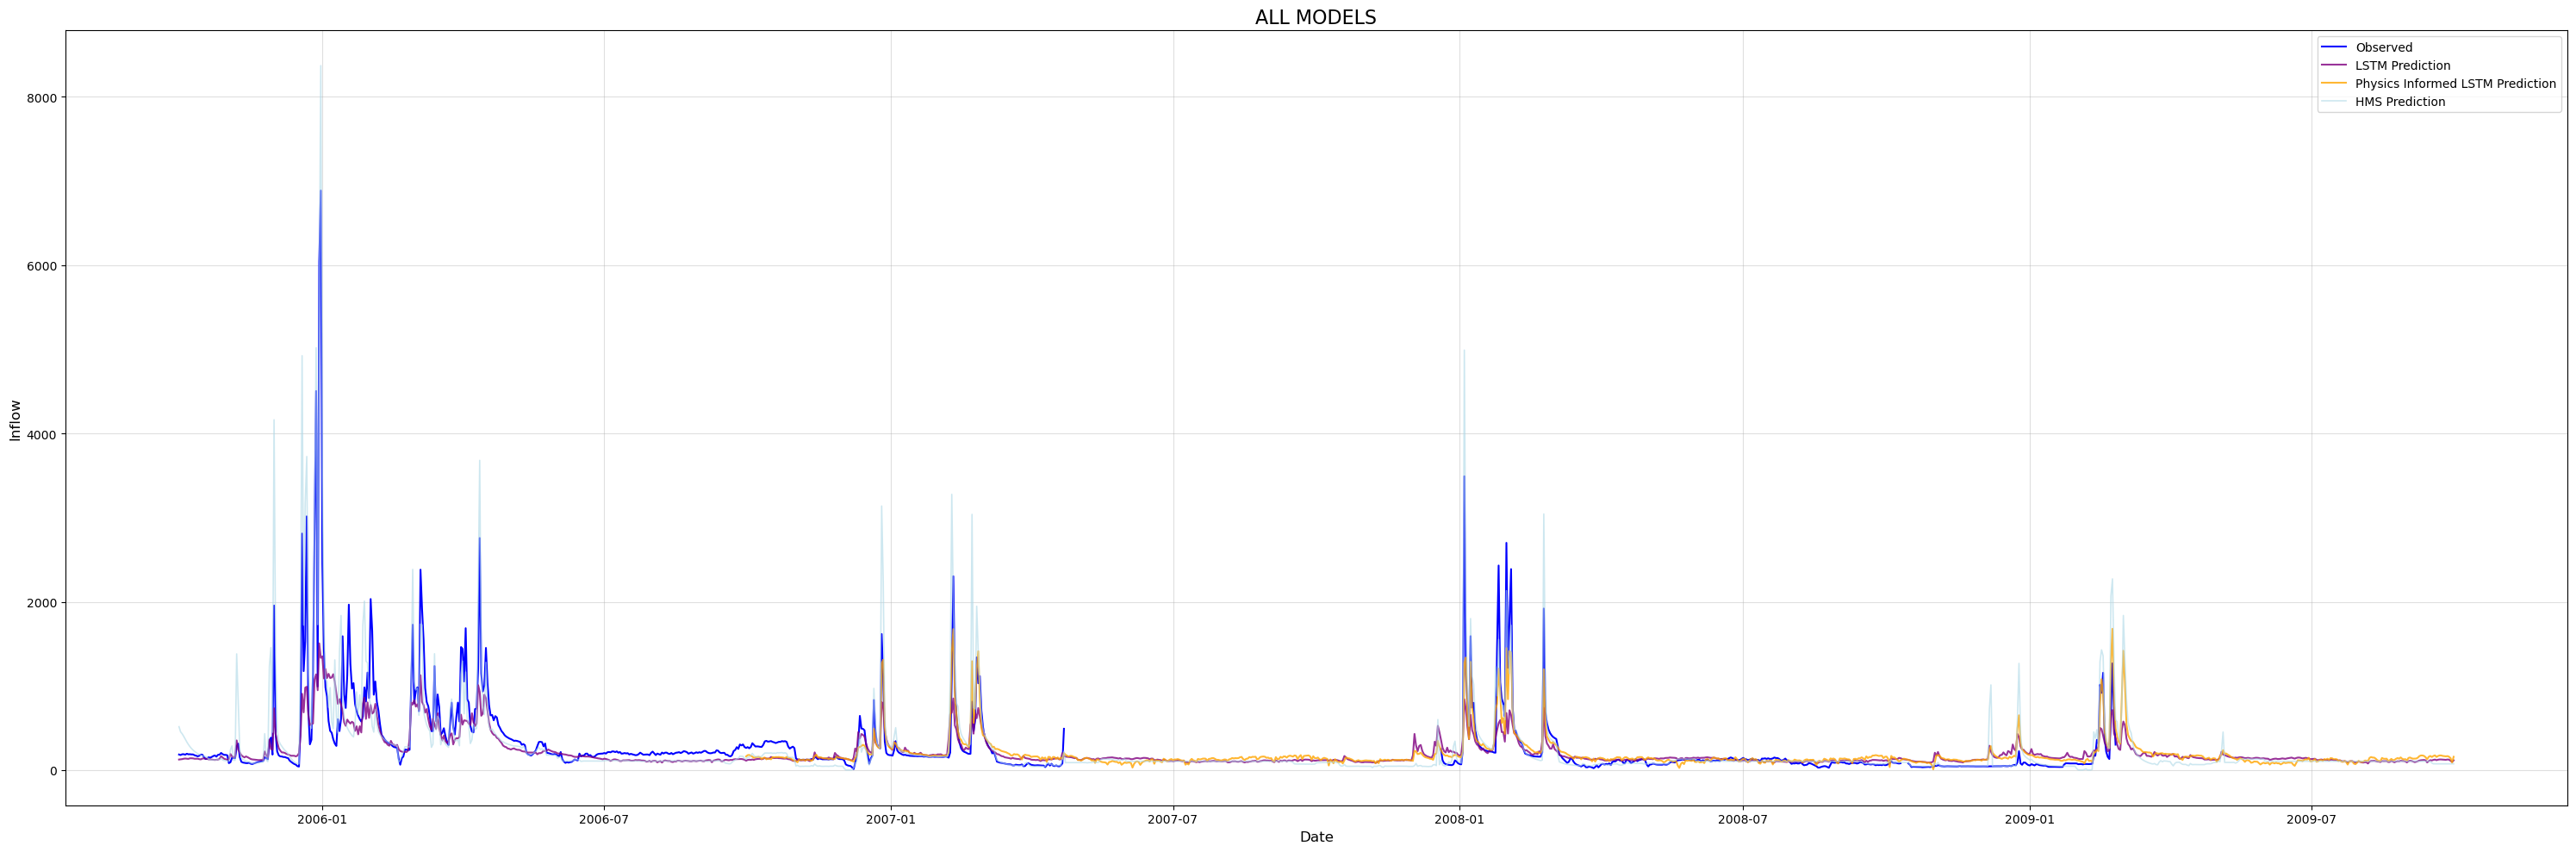

In [74]:
lstm_result_path = Path('/Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2811_185807/results_output.csv')
physics_informed_result_path = Path('/Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2811_185849/results_output.csv')
path_to_physics_data = Path("/Users/mia/research/russian_river_data_folder/calpella.csv")
combinedPlot(lstm_results=lstm_result_path, lstmPhysics_results= physics_informed_result_path, HMS_results=path_to_physics_data, title='ALL MODELS')